In [2]:
#https://davinci-ai.tistory.com/33

import gym
import tensorflow as tf
import random
import numpy as np


env = gym.make('MountainCar-v0')   # env = 언덕, 왼쪽과 오른쪽을 반복하여 가속도를 만들어야 오를 수 있음.
print(env.observation_space) # 관찰공간, agent가 환경을 볼 수 있는 범위
print(env.observation_space.low)
print(env.observation_space.high)

print(env._max_episode_steps) # 각 ep마다의 종료 조건, 해당값이 n이면 최대 n의 timestep를 가짐, n번 움직이면 종료
# agent : car
# action : left, stop, right


C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
[-1.2  -0.07]
[0.6  0.07]
200


In [3]:
print(env.action_space) # agent가 할 수 있는 행동의 경우의 수, discrete: 이산적, 정수로 나눌수 있음
# reward: 200이하의 step에서 time step마다 -1, 깃발(x축 0.5지점)에 도착하는 것(종료 조건, 최대 보상 조건)이 목표임

Discrete(3)


In [4]:
env = gym.make('MountainCar-v0') # 환경 생성

env.reset() # 환경 초기화
step = 0
score = 0
env.render() # 실행결과 화면으로 출력
env.close()
## 여기까지가 기본적인 동작

In [7]:
env = gym.make('MountainCar-v0') 
env.reset() # 환경 초기화
scores = []
training_data = [] 
accepted_scores = [] 
required_score = -198 


for i in range(200): 
    env.reset() 
    score = 0 
    game_memory = [] 
    previous_obs = [] 
    
    while True: 
        action = env.action_space.sample() 
        obs, reward, done, info = env.step(action) 
        if len(previous_obs) > 0: 
            game_memory.append([previous_obs, action]) 
        previous_obs = obs 
        if obs[0] > -0.2: 
            reward = 1 
        score += reward 
        if done: 
            break 
    scores.append(score) 
    if score > required_score: 
        accepted_scores.append(score) 
        for data in game_memory: 
            training_data.append(data) 

print('finished!') 
print('mean of scores', np.mean(scores)) 
print('length of acceted_scores', len(accepted_scores)) 
print('mean of acceted_scores', np.mean(accepted_scores))



finished!
mean of scores -199.91
length of acceted_scores 2
mean of acceted_scores -191.0


In [8]:
print(training_data)

[[array([-4.17207523e-01,  2.17090725e-04]), 1], [array([-0.41777489, -0.00056736]), 2], [array([-4.18122666e-01, -3.47778596e-04]), 0], [array([-0.42024838, -0.00212571]), 1], [array([-0.42313686, -0.00288848]), 0], [array([-0.42776745, -0.00463059]), 2], [array([-0.43210692, -0.00433947]), 1], [array([-0.43712399, -0.00501707]), 2], [array([-0.44178238, -0.00465838]), 1], [array([-0.44704824, -0.00526586]), 2], [array([-0.4518832 , -0.00483496]), 2], [array([-0.45625188, -0.00436869]), 2], [array([-0.46012224, -0.00387036]), 0], [array([-0.4654658 , -0.00534356]), 2], [array([-0.47024315, -0.00477735]), 0], [array([-0.47641896, -0.00617581]), 0], [array([-0.48394744, -0.00752848]), 0], [array([-0.49277261, -0.00882516]), 0], [array([-0.50282864, -0.01005603]), 0], [array([-0.51404034, -0.01121171]), 1], [array([-0.52532372, -0.01128338]), 2], [array([-0.53559417, -0.01027045]), 2], [array([-0.54477467, -0.0091805 ]), 2], [array([-0.55279646, -0.00802179]), 1], [array([-0.56059955, -0

In [11]:
train_X = np.array([i[0] for i in training_data]).reshape(-1, 2) 
train_Y = np.array([i[1] for i in training_data]).reshape(-1, 1)
model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(3, activation='softmax') 
]) 
model.compile(
    optimizer=tf.optimizers.Adam(), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
) 
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5) 
history = model.fit(train_X, train_Y, epochs=30, callbacks=[callback], batch_size=32, validation_split=0.25)



Epoch 1/300
392/392 [==============================] - 1s 1ms/step - loss: 1.0990 - accuracy: 0.3445 - val_loss: 1.0979 - val_accuracy: 0.3369
Epoch 2/300
392/392 [==============================] - 0s 992us/step - loss: 1.0965 - accuracy: 0.3642 - val_loss: 1.0938 - val_accuracy: 0.3836
Epoch 3/300
392/392 [==============================] - 0s 956us/step - loss: 1.0927 - accuracy: 0.3900 - val_loss: 1.0879 - val_accuracy: 0.4006
Epoch 4/300
392/392 [==============================] - 0s 847us/step - loss: 1.0877 - accuracy: 0.4039 - val_loss: 1.0857 - val_accuracy: 0.3994
Epoch 5/300
392/392 [==============================] - 0s 894us/step - loss: 1.0852 - accuracy: 0.4018 - val_loss: 1.0852 - val_accuracy: 0.4013
Epoch 6/300
392/392 [==============================] - 0s 830us/step - loss: 1.0858 - accuracy: 0.4031 - val_loss: 1.0847 - val_accuracy: 0.4013
Epoch 7/300
392/392 [==============================] - 0s 900us/step - loss: 1.0853 - accuracy: 0.4035 - val_loss: 1.0850 - val_accu

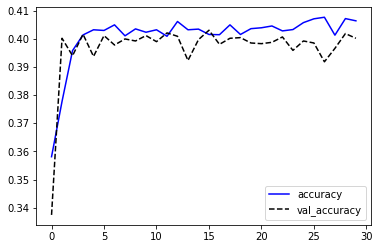

In [10]:
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'], 'b-', label='accuracy') 
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy') 
plt.legend() 
plt.show()

In [16]:

env.close()
env.reset()

score = 0 
step = 0 
previous_obs = [] 
while True: 
    if len(previous_obs) == 0: 
        action = env.action_space.sample() 
    else: 
        logit = model.predict(np.expand_dims(previous_obs, axis=0))[0] 
        action = np.argmax(logit) 
    obs, reward, done, _ = env.step(action) 
    previous_obs = obs 
    score += reward 
    step += 1 
    env.render()
    if done: 
        break 
        
print('score : ', score) 
print('step : ', step) 
env.close()



score :  -118.0
step :  118


In [17]:
#https://gist.github.com/gkhayes/3d154e0505e31d6367be22ed3da2e955

import numpy as np
import gym
import matplotlib.pyplot as plt

# Import and initialize Mountain Car Environment
env = gym.make('MountainCar-v0')
env.reset()

# Define Q-learning function
def QLearning(env, learning, discount, epsilon, min_eps, episodes):
    # Determine size of discretized state space
    num_states = (env.observation_space.high - env.observation_space.low)*\
                    np.array([10, 100])
    num_states = np.round(num_states, 0).astype(int) + 1
    
    # Initialize Q table
    Q = np.random.uniform(low = -1, high = 1, 
                          size = (num_states[0], num_states[1], 
                                  env.action_space.n))
    
    # Initialize variables to track rewards
    reward_list = []
    ave_reward_list = []
    
    # Calculate episodic reduction in epsilon
    reduction = (epsilon - min_eps)/episodes
    
    # Run Q learning algorithm
    for i in range(episodes):
        # Initialize parameters
        done = False
        tot_reward, reward = 0,0
        state = env.reset()
        
        # Discretize state
        state_adj = (state - env.observation_space.low)*np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
    
        while done != True:   
            # Render environment for last five episodes
            if i >= (episodes - 20):
                env.render()
                
            # Determine next action - epsilon greedy strategy
            if np.random.random() < 1 - epsilon:
                action = np.argmax(Q[state_adj[0], state_adj[1]]) 
            else:
                action = np.random.randint(0, env.action_space.n)
                
            # Get next state and reward
            state2, reward, done, info = env.step(action) 
            
            # Discretize state2
            state2_adj = (state2 - env.observation_space.low)*np.array([10, 100])
            state2_adj = np.round(state2_adj, 0).astype(int)
            
            #Allow for terminal states
            if done and state2[0] >= 0.5:
                Q[state_adj[0], state_adj[1], action] = reward
                
            # Adjust Q value for current state
            else:
                delta = learning*(reward + 
                                 discount*np.max(Q[state2_adj[0], 
                                                   state2_adj[1]]) - 
                                 Q[state_adj[0], state_adj[1],action])
                Q[state_adj[0], state_adj[1],action] += delta
                                     
            # Update variables
            tot_reward += reward
            state_adj = state2_adj
        
        # Decay epsilon
        if epsilon > min_eps:
            epsilon -= reduction
        
        # Track rewards
        reward_list.append(tot_reward)
        
        if (i+1) % 100 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []
            
        if (i+1) % 100 == 0:    
            print('Episode {} Average Reward: {}'.format(i+1, ave_reward))
            
    env.close()
    
    return ave_reward_list

# Run Q-learning algorithm
rewards = QLearning(env, 0.2, 0.9, 0.8, 0, 50000)

# Plot Rewards
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
plt.savefig('rewards.jpg')     
plt.close()  

Episode 100 Average Reward: -200.0
Episode 200 Average Reward: -200.0
Episode 300 Average Reward: -200.0
Episode 400 Average Reward: -200.0
Episode 500 Average Reward: -200.0
Episode 600 Average Reward: -200.0
Episode 700 Average Reward: -200.0
Episode 800 Average Reward: -200.0
Episode 900 Average Reward: -200.0
Episode 1000 Average Reward: -200.0
Episode 1100 Average Reward: -200.0
Episode 1200 Average Reward: -200.0
Episode 1300 Average Reward: -200.0
Episode 1400 Average Reward: -200.0
Episode 1500 Average Reward: -200.0
Episode 1600 Average Reward: -200.0
Episode 1700 Average Reward: -200.0
Episode 1800 Average Reward: -200.0
Episode 1900 Average Reward: -200.0
Episode 2000 Average Reward: -200.0
Episode 2100 Average Reward: -200.0
Episode 2200 Average Reward: -200.0
Episode 2300 Average Reward: -200.0
Episode 2400 Average Reward: -200.0
Episode 2500 Average Reward: -200.0
Episode 2600 Average Reward: -200.0
Episode 2700 Average Reward: -200.0
Episode 2800 Average Reward: -200.0
E

Episode 22600 Average Reward: -200.0
Episode 22700 Average Reward: -200.0
Episode 22800 Average Reward: -200.0
Episode 22900 Average Reward: -200.0
Episode 23000 Average Reward: -200.0
Episode 23100 Average Reward: -200.0
Episode 23200 Average Reward: -200.0
Episode 23300 Average Reward: -200.0
Episode 23400 Average Reward: -200.0
Episode 23500 Average Reward: -200.0
Episode 23600 Average Reward: -200.0
Episode 23700 Average Reward: -200.0
Episode 23800 Average Reward: -200.0
Episode 23900 Average Reward: -200.0
Episode 24000 Average Reward: -199.99
Episode 24100 Average Reward: -199.88
Episode 24200 Average Reward: -200.0
Episode 24300 Average Reward: -200.0
Episode 24400 Average Reward: -200.0
Episode 24500 Average Reward: -200.0
Episode 24600 Average Reward: -199.8
Episode 24700 Average Reward: -200.0
Episode 24800 Average Reward: -199.93
Episode 24900 Average Reward: -200.0
Episode 25000 Average Reward: -199.9
Episode 25100 Average Reward: -200.0
Episode 25200 Average Reward: -200.

Episode 44500 Average Reward: -196.96
Episode 44600 Average Reward: -196.27
Episode 44700 Average Reward: -188.65
Episode 44800 Average Reward: -181.76
Episode 44900 Average Reward: -190.65
Episode 45000 Average Reward: -190.58
Episode 45100 Average Reward: -190.64
Episode 45200 Average Reward: -187.31
Episode 45300 Average Reward: -185.3
Episode 45400 Average Reward: -193.09
Episode 45500 Average Reward: -175.43
Episode 45600 Average Reward: -178.82
Episode 45700 Average Reward: -190.09
Episode 45800 Average Reward: -198.58
Episode 45900 Average Reward: -195.47
Episode 46000 Average Reward: -186.16
Episode 46100 Average Reward: -186.34
Episode 46200 Average Reward: -193.18
Episode 46300 Average Reward: -196.52
Episode 46400 Average Reward: -181.37
Episode 46500 Average Reward: -197.02
Episode 46600 Average Reward: -188.48
Episode 46700 Average Reward: -194.07
Episode 46800 Average Reward: -197.34
Episode 46900 Average Reward: -197.82
Episode 47000 Average Reward: -191.88
Episode 47100

### CART POLE by Q-network
https://skettee.github.io/post/q_network/

In [21]:
import gym
import numpy as np

#
# Environment
#
env = gym.make('CartPole-v1')
state = env.reset()
action = env.action_space.sample()

print('State space: ', env.observation_space)
print('Initial state: ', state)
print('\nAction space: ', env.action_space)
print('Random action: ', action)

State space:  Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
Initial state:  [ 0.02811221 -0.0441772   0.00963665 -0.04237553]

Action space:  Discrete(2)
Random action:  1


In [22]:
# Q-Network Modeling
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

num_state = env.observation_space.shape[0]
num_action = env.action_space.n

model = Sequential()
model.add(Dense(32, input_dim= num_state, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_action, activation=None))
model.compile(loss='mse', optimizer="adam")

In [ ]:
from tqdm import tqdm

num_iteration = 500
min_timesteps_per_batch = 2500

# Hyper parameter
epsilon = 0.3
gamma = 0.95
batch_size = 32

# Q-Network Learning
for i in tqdm(range(num_iteration)):
    timesteps_this_batch = 0
    memory = []
    while True:
        state = env.reset()
        done = False
        while not done:
            if np.random.uniform() < epsilon:
                action = env.action_space.sample()
            else:
                q_value = model.predict(state.reshape(1, num_state))
                action = np.argmax(q_value[0])
            next_state, reward, done, info = env.step(action)
            # Memory
            memory.append((state, action, reward, next_state, done))

            state = next_state

        timesteps_this_batch += len(memory)
        if timesteps_this_batch > min_timesteps_per_batch:
            break

    # Replay   
    for state, action, reward, next_state, done in memory:
        if done:
            target = reward
        else:
            target = reward + gamma * (np.max(model.predict(next_state.reshape(1, num_state))[0]))
        q_value = model.predict(state.reshape(1, num_state))
        q_value[0][action] = target
        model.fit(state.reshape(1, num_state), q_value, epochs=1, batch_size=32, verbose=0)

env.close()

  3%|██▌                                                                            | 16/500 [07:43<5:03:42, 37.65s/it]

In [ ]:
import os

save_dir = os.getcwd()
model_name = 'keras_dqn_trained_model.h5'

# Save model and weights
model_path = os.path.join(save_dir, model_name)
model.save(model_path)

In [ ]:
from gym.wrappers import Monitor

import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

def show_video(file_infix):
    with open('./video/openaigym.video.%s.video000000.mp4' % file_infix, 'r+b') as f:
        video = f.read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="Trained CartPole" autoplay 
                loop style="height: 200px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
                 </video>'''.format(encoded.decode('ascii'))))
    
def wrap_env(env):
    env = Monitor(env, './video', force=True)
    return env

In [ ]:
from  tensorflow.keras.models import load_model
import os

load_dir = os.getcwd()
model_name = 'keras_dqn_trained_model.h5'
model_path = os.path.join(load_dir, model_name)
model = load_model(model_path)

In [ ]:
import gym
import numpy as np

env = wrap_env(gym.make('CartPole-v1'))
num_state = env.observation_space.shape[0]
state = env.reset()
done = False

while not done:
    state = np.array(state).reshape(1, num_state)
    q_value = model.predict(state)
    action = np.argmax(q_value[0])
    state, reward, done, info = env.step(action)

file_infix = env.file_infix
env.close()

show_video(file_infix)

In [13]:
# http://jinicoding.net/openai-gym%EC%9C%BC%EB%A1%9C-q-table-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98-%EB%A7%8C%EB%93%A4%EA%B8%B0-2/

In [2]:
import gym
import numpy as np

env = gym.make("MountainCar-v0")

LEARNING_RATE = 0.1

DISCOUNT = 0.95
EPISODES = 25000

DISCRETE_OS_SIZE = [20, 20]
discrete_os_win_size = (env.observation_space.high - env.observation_space.low)/DISCRETE_OS_SIZE

q_table = np.random.uniform(low=-2, high=0, size=(DISCRETE_OS_SIZE + [env.action_space.n]))


def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low)/discrete_os_win_size
    return tuple(discrete_state.astype(np.int))  # we use this tuple to look up the 3 Q values for the available actions in the q-table


discrete_state = get_discrete_state(env.reset()) #초기 상태값을 가져옵니다.
done = False
while not done:

    action = np.argmax(q_table[discrete_state]) #처음 예제에서 action = 2
    new_state, reward, done, _ = env.step(action)

    new_discrete_state = get_discrete_state(new_state) #새로운 상태값

    env.render()
#     new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

#이제 Q-값을 업데이트합니다. 이미 만든 액션에 대한 Q값을 업데이트하고 있다는 점에 유의하십시오.
    # If simulation did not end yet after last step - update Q table
    if not done:

        # Maximum possible Q value in next step (for new state)
        max_future_q = np.max(q_table[new_discrete_state])

        # Current Q value (for current state and performed action)
        current_q = q_table[discrete_state + (action,)]

        # And here's our equation for a new Q value for current state and action
        new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

        # Update Q table with new Q value
        q_table[discrete_state + (action,)] = new_q


    # Simulation ended (for any reson) - if goal position is achived - update Q value with reward directly
    elif new_state[0] >= env.goal_position:
        #q_table[discrete_state + (action,)] = reward
        q_table[discrete_state + (action,)] = 0

    discrete_state = new_discrete_state


env.close()

In [3]:
# http://incredible.ai/machine-learning/2019/02/10/Q-Learning/

In [4]:
env = gym.make('MountainCar-v0')
env.observation_space.high  # array([0.6 , 0.07], dtype=float32)
env.observation_space.low   # array([-1.2 , -0.07], dtype=float32)
env = gym.make('MountainCar-v0')
n_state = (env.observation_space.high - env.observation_space.low) * np.array([10, 100])
n_state = np.round(n_state, 0).astype(int) + 1

Q = np.random.uniform(-1, 1, size=(n_state[0], n_state[1], env.action_space.n))
print('Q shape:', Q.shape)
print('Q Table')
print(Q[1:2])

Q shape: (19, 15, 3)
Q Table
[[[-0.02936094  0.74602922  0.33627678]
  [-0.79968293 -0.5964087  -0.36720024]
  [ 0.02152412  0.24354948  0.02032514]
  [-0.795604   -0.72775485  0.40561727]
  [-0.90822443 -0.784341   -0.27912673]
  [-0.19860674  0.73301371 -0.60809526]
  [ 0.87104498 -0.30647992 -0.44885352]
  [-0.64489883 -0.55912948  0.0235889 ]
  [-0.4630339  -0.38834287  0.41715608]
  [-0.19330635  0.35999446 -0.21959744]
  [ 0.20651598 -0.44123894 -0.10787226]
  [-0.45748184  0.25516247 -0.34291327]
  [ 0.27921404 -0.83795453  0.93058484]
  [ 0.3807966  -0.26078929  0.72581876]
  [-0.80068561 -0.49691774  0.75136827]]]


In [5]:
from tqdm import *
def discretize(env, state):
    state = (state - env.observation_space.low) * np.array([10, 100])
    state = np.round(state, 0).astype(int)
    return state

def train(env, Q, epochs=10000, lr=0.1, gamma=0.9, epsilon=0.9):
    reduction = epsilon/epochs
    action_n = env.action_space.n
    
    rewards = list()
    
    for epoch in tqdm_notebook(range(epochs)):
        state = env.reset()
        state = discretize(env, state)
        
        done = False
        _tot_reward = 0
        _tot_rand_action = 0
        _tot_q_action = 0
        _max_pos = 0
        
        while not done:

            # Calculate next action
            if np.random.random() < 1 - epsilon:
                action = np.argmax(Q[state[0], state[1]])
                _tot_q_action += 1
            else:
                action = np.random.randint(0, action_n)
                _tot_rand_action += 1
                
            # Step!
            next_state, reward, done, info = env.step(action)
            next_state_apx = discretize(env, next_state)

            # Terminal Update
            if done and next_state[0] >= 0.5:
                Q[next_state_apx[0], next_state_apx[1], action] = reward
            else:
                delta = lr * (reward + gamma * np.max(Q[next_state_apx[0], next_state_apx[1]]) - 
                              Q[state[0], state[1], action])
                Q[state[0], state[1], action] += delta
            
            state = next_state_apx
            _tot_reward += reward
            
        # Decay Epsilon
        if epsilon > 0:
            epsilon -= reduction
            epsilon = round(epsilon, 4)
            
        # Track Rewards
        rewards.append(_tot_reward)
        
        # Log
        if epoch%100 == 0:
            print(f'\repoch:{epoch} | tot reward:{_tot_reward} | epsilon:{epsilon} | ' 
                  f'rand action:{_tot_rand_action} | Q action:{_tot_q_action}')

train(env, Q)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  del sys.path[0]


  0%|          | 0/10000 [00:00<?, ?it/s]

epoch:0 | tot reward:-200.0 | epsilon:0.8999 | rand action:178 | Q action:22
epoch:100 | tot reward:-200.0 | epsilon:0.8899 | rand action:174 | Q action:26
epoch:200 | tot reward:-200.0 | epsilon:0.8799 | rand action:172 | Q action:28
epoch:300 | tot reward:-200.0 | epsilon:0.8699 | rand action:171 | Q action:29
epoch:400 | tot reward:-200.0 | epsilon:0.8599 | rand action:167 | Q action:33
epoch:500 | tot reward:-200.0 | epsilon:0.8499 | rand action:172 | Q action:28
epoch:600 | tot reward:-200.0 | epsilon:0.8399 | rand action:168 | Q action:32
epoch:700 | tot reward:-200.0 | epsilon:0.8299 | rand action:169 | Q action:31
epoch:800 | tot reward:-200.0 | epsilon:0.8199 | rand action:172 | Q action:28
epoch:900 | tot reward:-200.0 | epsilon:0.8099 | rand action:162 | Q action:38
epoch:1000 | tot reward:-200.0 | epsilon:0.7999 | rand action:156 | Q action:44
epoch:1100 | tot reward:-200.0 | epsilon:0.7899 | rand action:158 | Q action:42
epoch:1200 | tot reward:-200.0 | epsilon:0.7799 | ra

In [8]:
env = gym.make('MountainCar-v0')
state = env.reset()
state = discretize(env, state)


# input()

while True:
    env.render()
    action = np.argmax(Q[state[0], state[1]])
    state, reward, done, info = env.step(action)
    state = discretize(env, state)
    
    print(f'\rstate:{state} | reward:{reward} | done:{done} | info:{info}')
    
    if done:
        break
env.close()

state:[7 7] | reward:-1.0 | done:False | info:{}
state:[7 7] | reward:-1.0 | done:False | info:{}
state:[7 7] | reward:-1.0 | done:False | info:{}
state:[7 7] | reward:-1.0 | done:False | info:{}
state:[7 6] | reward:-1.0 | done:False | info:{}
state:[7 6] | reward:-1.0 | done:False | info:{}
state:[7 6] | reward:-1.0 | done:False | info:{}
state:[7 6] | reward:-1.0 | done:False | info:{}
state:[6 6] | reward:-1.0 | done:False | info:{}
state:[6 6] | reward:-1.0 | done:False | info:{}
state:[6 6] | reward:-1.0 | done:False | info:{}
state:[6 6] | reward:-1.0 | done:False | info:{}
state:[6 6] | reward:-1.0 | done:False | info:{}
state:[6 6] | reward:-1.0 | done:False | info:{}
state:[6 6] | reward:-1.0 | done:False | info:{}
state:[6 6] | reward:-1.0 | done:False | info:{}
state:[6 6] | reward:-1.0 | done:False | info:{}
state:[5 6] | reward:-1.0 | done:False | info:{}
state:[5 6] | reward:-1.0 | done:False | info:{}
state:[5 6] | reward:-1.0 | done:False | info:{}
state:[5 6] | reward

## coursehero 참조

In [ ]:
#  https://www.coursehero.com/u/file/119544747/Mountain-Carpy/?justUnlocked=1#question

In [2]:
import numpy as np
import gym
import matplotlib.pyplot as plt
# Import and initialize Mountain Car Environment
env = gym.make('MountainCar-v0')
env.reset()
# Define Q-learning function
def QLearning(env, learning, discount, epsilon, min_eps, episodes):
    # Determine size of discretized state space
    num_states = (env.observation_space.high - env.observation_space.low)*\
    np.array([10, 100])
    num_states = np.round(num_states, 0).astype(int) + 1
    # Initialize Q table
    Q = np.random.uniform(low = -1, high = 1,
    size = (num_states[0], num_states[1],
    env.action_space.n))
    # Initialize variables to track rewards
    reward_list = []
    ave_reward_list = []
    # Calculate episodic reduction in epsilon
    reduction = (epsilon - min_eps)/episodes
    # Run Q learning algorithm
    for i in range(episodes):
        # Initialize parameters
        done = False
        tot_reward, reward = 0,0
        state = env.reset()
        # Discretize state
        state_adj = (state - env.observation_space.low)*np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
        while done != True:
            # Render environment for last five episodes
            if i >= (episodes - 20):
                env.render()
            # Determine next action - epsilon greedy strategy
            if np.random.random() < 1 - epsilon:
                action = np.argmax(Q[state_adj[0], state_adj[1]])
            else:
                action = np.random.randint(0, env.action_space.n)
            # Get next state and reward
            state2, reward, done, info = env.step(action)
            # Discretize state2
            state2_adj = (state2 - env.observation_space.low)*np.array([10, 100])
            state2_adj = np.round(state2_adj, 0).astype(int)
            # Allow for terminal states
            if done and state2[0] >= 0.5:
                Q[state_adj[0], state_adj[1], action] = reward

            # Adjust Q value for current state
            else:
                delta = learning*(reward + discount*np.max(Q[state2_adj[0], state2_adj[1]]) - Q[state_adj[0], state_adj[1],action])
                Q[state_adj[0], state_adj[1],action] += delta
            # Update variables
            tot_reward += reward
            state_adj = state2_adj
        # Decay epsilon
        if epsilon > min_eps:
            epsilon -= reduction
        # Track rewards
        reward_list.append(tot_reward)
        if (i+1) % 100 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []
        if (i+1) % 100 == 0:
            print('Episode {} Average Reward: {}'.format(i+1, ave_reward))
    env.close()
    return ave_reward_list
# Run Q-learning algorithm
rewards = QLearning(env, 0.2, 0.9, 0.8, 0, 3000)
# Plot Rewards
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
plt.savefig('rewards.jpg')
plt.close()

Episode 100 Average Reward: -200.0
Episode 200 Average Reward: -200.0
Episode 300 Average Reward: -200.0
Episode 400 Average Reward: -200.0
Episode 500 Average Reward: -200.0
Episode 600 Average Reward: -200.0
Episode 700 Average Reward: -200.0
Episode 800 Average Reward: -200.0
Episode 900 Average Reward: -200.0
Episode 1000 Average Reward: -200.0
Episode 1100 Average Reward: -200.0
Episode 1200 Average Reward: -200.0
Episode 1300 Average Reward: -200.0
Episode 1400 Average Reward: -200.0
Episode 1500 Average Reward: -200.0
Episode 1600 Average Reward: -200.0
Episode 1700 Average Reward: -200.0
Episode 1800 Average Reward: -200.0
Episode 1900 Average Reward: -200.0
Episode 2000 Average Reward: -200.0
Episode 2100 Average Reward: -200.0
Episode 2200 Average Reward: -200.0
Episode 2300 Average Reward: -200.0
Episode 2400 Average Reward: -200.0
Episode 2500 Average Reward: -200.0
Episode 2600 Average Reward: -200.0
Episode 2700 Average Reward: -200.0
Episode 2800 Average Reward: -200.0
E

Episode 22600 Average Reward: -199.69
Episode 22700 Average Reward: -200.0
Episode 22800 Average Reward: -200.0
Episode 22900 Average Reward: -200.0
Episode 23000 Average Reward: -200.0
Episode 23100 Average Reward: -200.0
Episode 23200 Average Reward: -200.0
Episode 23300 Average Reward: -200.0
Episode 23400 Average Reward: -200.0
Episode 23500 Average Reward: -200.0
Episode 23600 Average Reward: -200.0
Episode 23700 Average Reward: -200.0
Episode 23800 Average Reward: -200.0
Episode 23900 Average Reward: -200.0
Episode 24000 Average Reward: -199.61
Episode 24100 Average Reward: -200.0
Episode 24200 Average Reward: -200.0
Episode 24300 Average Reward: -200.0
Episode 24400 Average Reward: -200.0
Episode 24500 Average Reward: -200.0
Episode 24600 Average Reward: -200.0
Episode 24700 Average Reward: -200.0
Episode 24800 Average Reward: -200.0
Episode 24900 Average Reward: -200.0
Episode 25000 Average Reward: -200.0
Episode 25100 Average Reward: -200.0
Episode 25200 Average Reward: -200.0

Episode 44500 Average Reward: -196.44
Episode 44600 Average Reward: -191.78
Episode 44700 Average Reward: -188.49
Episode 44800 Average Reward: -192.33
Episode 44900 Average Reward: -197.9
Episode 45000 Average Reward: -185.89
Episode 45100 Average Reward: -188.11
Episode 45200 Average Reward: -182.64
Episode 45300 Average Reward: -188.0
Episode 45400 Average Reward: -189.09
Episode 45500 Average Reward: -187.65
Episode 45600 Average Reward: -186.13
Episode 45700 Average Reward: -176.12
Episode 45800 Average Reward: -178.01
Episode 45900 Average Reward: -181.24
Episode 46000 Average Reward: -197.8
Episode 46100 Average Reward: -197.1
Episode 46200 Average Reward: -198.72
Episode 46300 Average Reward: -195.03
Episode 46400 Average Reward: -192.18
Episode 46500 Average Reward: -189.61
Episode 46600 Average Reward: -187.91
Episode 46700 Average Reward: -178.99
Episode 46800 Average Reward: -180.89
Episode 46900 Average Reward: -193.71
Episode 47000 Average Reward: -191.15
Episode 47100 Av

##https://gist.github.com/ByungSunBae/563a0d554fa4657a5adefb1a9c985626?fbclid=IwAR0yhyOPrM5MelennwCMw1A2Tm867tvkCk0ioud_u8TR8Fq6A-aY4F_vfgk